In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import methods_comparison

In [30]:
t = np.linspace(0, 200, 1000)
x = np.stack([np.sin(.5 * t), np.cos(t)])
y = stats.ortho_group.rvs(4)[:, :2].dot(x)
y += np.random.randn(*y.shape) / 40.
y -= y.mean(axis=1, keepdims=True)

In [31]:
u, s, vh = np.linalg.svd(y)
whiten = np.diag(1./s).dot(u.T)
yw = whiten.dot(y)
yp = np.diff(yw, axis=1)

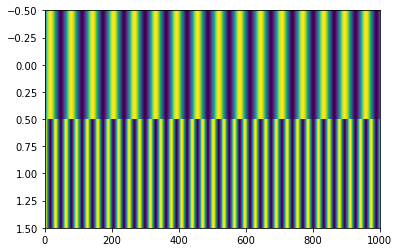

In [32]:
plt.imshow(x, aspect='auto')
plt.show()

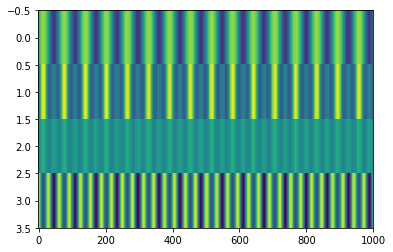

In [33]:
plt.imshow(y, aspect='auto')
plt.show()

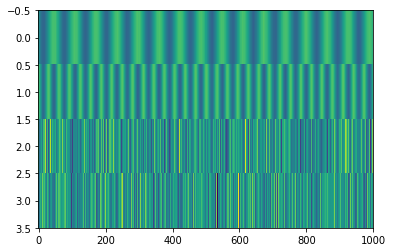

In [34]:
plt.imshow(yw, aspect='auto')
plt.show()

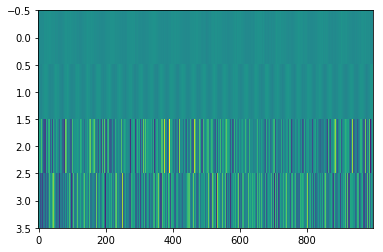

In [35]:
plt.imshow(yp, aspect='auto')
plt.show()

In [36]:
u, s, vh = np.linalg.svd(yp, full_matrices=False)
proj = u.T

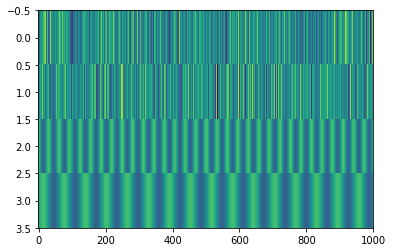

In [37]:
y_proj = proj.dot(whiten.dot(y))
plt.imshow(y_proj, aspect='auto')
plt.show()

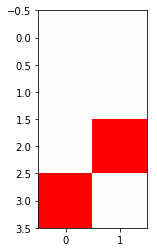

In [38]:
y_norm = y_proj - y_proj.mean(axis=1, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=1, keepdims=True)
x_norm = x - x.mean(axis=1, keepdims=True)
x_norm /= np.linalg.norm(x_norm, axis=1, keepdims=True)
corr = y_norm.dot(x_norm.T)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [39]:
corr

array([[  1.14679782e-07,   1.60310558e-07],
       [  6.89841859e-07,   3.46819489e-06],
       [  2.67068953e-05,   9.98668965e-01],
       [  9.98678394e-01,   4.93037750e-05]])

In [40]:
SFA = methods_comparison.SlowFeatureAnalysis(2)

In [41]:
y_est = SFA.fit_transform(y)

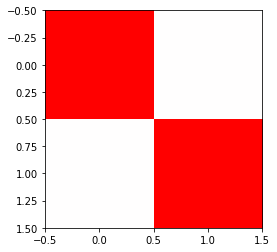

In [42]:
y_norm = y_est - y_est.mean(axis=1, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=1, keepdims=True)
corr = y_norm.dot(x_norm.T)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [43]:
corr

array([[  9.98678394e-01,   4.93037750e-05],
       [  2.67068953e-05,   9.98668965e-01]])